## Параметрические критерии для оценки среднего

### Одновыборочный критерий с большим числом наблюдений

Наблюдаем: $X_{1}, X_{2}, \cdots, X_{n}$

Предполагаем: $X_{i}$ независимы и одинаково распределены (не обязательно нормально), количество наблюдений n велико

Проверяемая гипотеза: $H_{0}:\mu = \mu_{0}, H_{1} : \mu <> \mu_{0}$

**Статистика:** $Z = \frac {\overline{X} - \mu} {\frac {S} {\sqrt{n}}} \sim N(0, 1)$ при верной $H_{0}$

Такой критерий называют асимптотический, так как использует ЦПТ.

### Одновыборочный критерий с малым числом наблюдений и известной дисперсией

Наблюдаем: $X_{1}, X_{2}, \cdots, X_{n}$, известна $\sigma^{2}$

Предполагаем: $X_{i}$ независимы и одинаково **нормально** распределены, небольшое число наблюдений n

Проверяемая гипотеза: $H_{0}:\mu = \mu_{0}, H_{1} : \mu <> \mu_{0}$

**Статистика:** $Z = \frac {\overline{X} - \mu} {\frac {\sigma} {\sqrt{n}}} \sim N(0, 1)$ при верной $H_{0}$

### Одновыборочный критерий с малым числом наблюдений и неизвестной дисперсией - критерий Стьюдента

Наблюдаем: $X_{1}, X_{2}, \cdots, X_{n}$:

Предполагаем: $X_{i}$ независимы и одинаково **нормально** распределены, небольшое число наблюдений n

Проверяемая гипотеза: $H_{0}:\mu = \mu_{0}, H_{1} : \mu <> \mu_{0}$

**Статистика:** $t = \frac {\overline{X} - \mu} {\frac {S} {\sqrt{n}}} \sim t$ при верной $H_{0}$

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
sample = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
         59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
         34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
popmean = 37.
alternative = 'two-sided'

# a - выборка данных
# popmean - среднее, с которым хотим сравнить гипотезу
# alternative - вид альтернативной гипотезы

stats.ttest_1samp(sample, popmean, alternative=alternative)

TtestResult(statistic=-1.7634163815266284, pvalue=0.0883655567095017, df=29)

При работе с данным критерием, чтобы убедиться, что выборка принадлежит к нормальному распределению используется один из критериев согласия.

### Проверка распределений на нормальность

Чаще всего используют следующие способы проверки распределений на нормальность:
* визуальная оценка с помощью графика Q-Q графика
* статистический критерий Шапиро-Уилко
* статистический критерий Колмогорова-Смирнова
* и т.д.

### Пример построения Q-Q графика

In [7]:
d = stats.lognorm(0.5, loc=25, scale=10)
sample_1 = d.rvs(size=300)

d = stats.norm(loc=25, scale=10)
sample_2 = d.rvs(size=300)

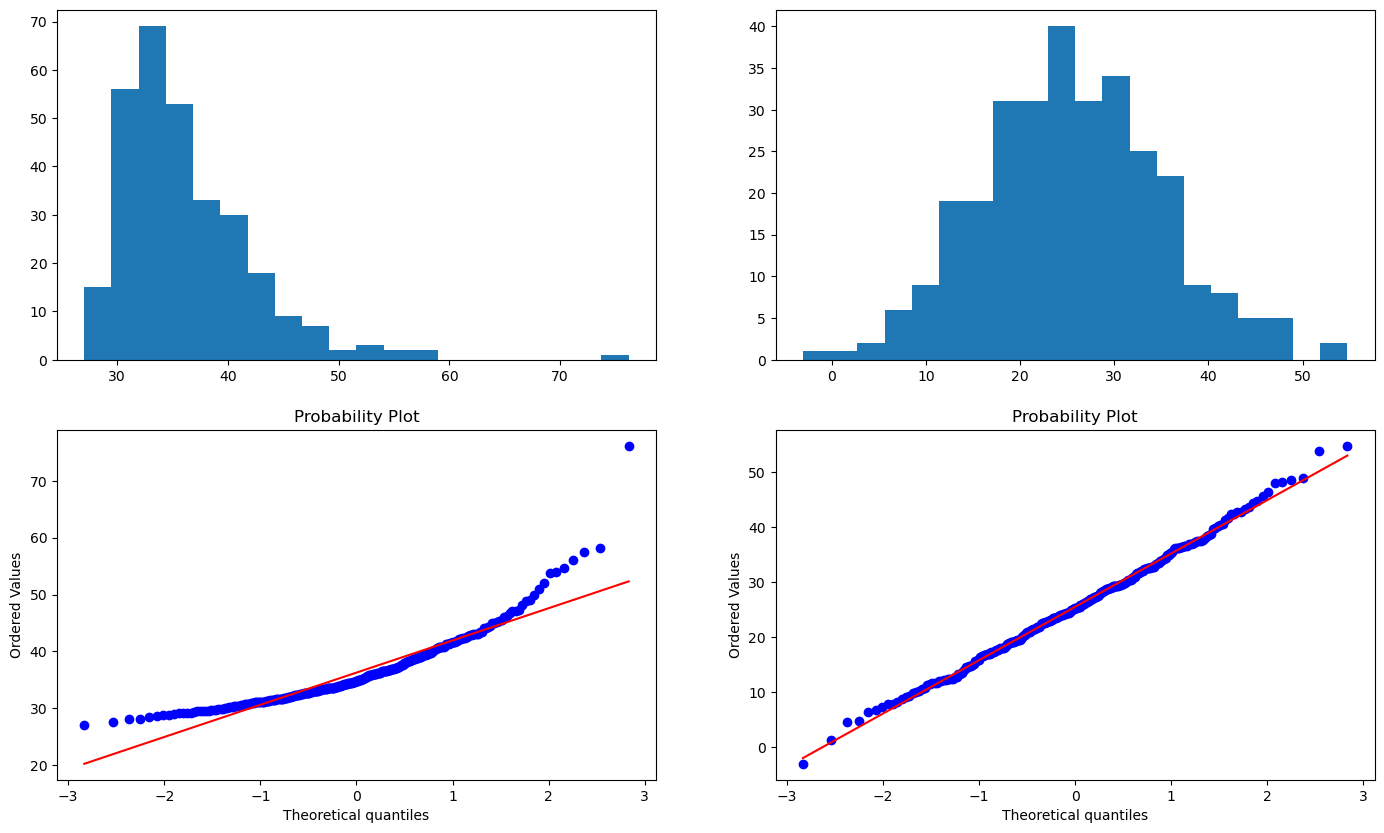

In [9]:
fig = plt.figure(figsize=(17, 10))
ax1 = fig.add_subplot(221)
plt.hist(sample_1, bins=20)
ax2 = fig.add_subplot(222)
plt.hist(sample_2, bins=20)
ax3 = fig.add_subplot(223)
stats.probplot(sample_1, dist='norm', plot=plt)
ax3 = fig.add_subplot(224)
stats.probplot(sample_2, dist='norm', plot=plt)
plt.show()

Точки выборки с нормальным распределением лежат на прямой

### Применение критерия Шапиро-Уилко

In [4]:
d = stats.lognorm(0.5, loc=25, scale=10)
sample_1 = d.rvs(size=35)

d = stats.norm(loc=25, scale=10)
sample_2 = d.rvs(size=30)

In [5]:
stats.shapiro(sample_1)

ShapiroResult(statistic=0.9539317488670349, pvalue=0.1496119648218155)

In [6]:
stats.shapiro(sample_2)

ShapiroResult(statistic=0.9671861529350281, pvalue=0.46532678604125977)

В первом случае нулевая гипотеза о нормальном распределении данных отвергается в пользу альтернативы, во втором случае принимается нулевая гипотеза (p > 0.05), при заданном уровне значимости равным 5%.

### Задача

Средняя сессия посетителя игрового компьютерного клуба составляет 90 минут. Владелец клуба хочет увеличить время игровых сессий, потому что так он сможет получить больше выручки, решая заменить старые компьютеры на новые. В итоге, в течение следующих дней игроки проводят 20 сессий средней длинной 102 минуты со стандартным отклонением 15 минут.

Необходимо понять, увеличилось ли время сессии за счёт того, что владелец клуба заменил компьютеры?

### Решение задачи

1. Имеем дело с **одновыборочным** критерием, так как у нас только одна группа пользователей, над которыми проводился эксперимент.
2. Данных немного (n = 20), поэтому не можем воспользоваться при расчёте Z-критерием.
3. Не имея возможности оценить выборку (данных к задаче просто не прилагается) можно сделать предположение о том, что данные в выборке 20 игровых сессий пользователей распределены нормально.

4. Проверяемая гипотеза: $H_{0} : \mu$ = 90 минут, $H_{1} : \mu$ > 90 минут

Стоит сразу обратить внимание, что будем проверятть одностороннюю гипотезу, то есть хотим оценить именно эффект улучшения.

5. Установим уровень значимости критерия $\alpha$ = 5%.
6. С учётом предположения о нормальности данных для расчёта будем использовать критерий Стьюдента.

In [7]:
sample_mean = 102
mu = 90
n = 20
sample_std = 15

In [9]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))

7. Рассчитаем t-критическое, обратим внимание, что в данном случае проверяем именно односторонюю гипотезу (в случае двухсторонней гипотезы на концах распределения приходилась бы вероятностная масса $\frac {\alpha} {2}$)

In [10]:
t_crit = stats.t.ppf(1-0.05, n)
t_crit

1.7247182429207857

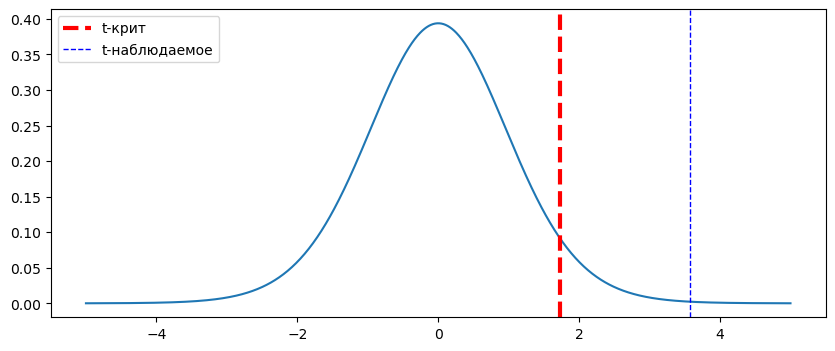

In [11]:
fig = plt.figure(figsize=(10, 4))
xs =  np.linspace(-5, 5, 1000)
plt.plot(xs, stats.t.pdf(xs, n - 1))
plt.axvline(t_crit, color='red', linestyle='dashed', linewidth=3, label='t-крит')
plt.axvline(t, color='blue', linestyle='dashed', linewidth=1, label='t-наблюдаемое')
plt.legend()
plt.show()

8. Вывод: на уровне значимости $\alpha$ отвергаем нулевую гипотезу о невлиянии новых компьютеров на длину сессии в пользу альтернативной.

### Двувыборочный критерий с большим числом наблюдений

Наблюдаем: $X_1, X_2, \cdots, X_{n_x}, Y_1, Y_2, \cdots, Y_{n_y}$;

Предполагаем: $X_i$ независимы и одинаково распределены (не обязательно нормально), $Y_i$ независимы и одинаково распределены (не обязательно нормально), количество наблюдений $n_x, n_y$ велико. Все величины независимыю;

Проверяемая гипотеза: $H_0:\mu_x = \mu_y. H_1 : \mu_x <> \mu_y$

**Статистика:** $Z = \frac {\overline X - \overline Y} {\sqrt{\frac {S_x^2} {n_x} + \frac {S_y^2} {n_y}}} \sim N(0, 1)$ при верной $H_{0}$

Опять же, как и при одновыборочном критерии, такие выводы мы можем сделать исходя из ЦПТ.

### Двувыборочные критерии с малым числом наблюдений

При работе с небольшим числом наблюдений мы не можем воспользоваться асимптотическим критерием, работаем с так называемыми точными критериями, которые делают предположение исходя уже из самого распределения.

Возможны три ситуации:

1. известны дисперсии генеральной совокупности у обеих выборок, тогда:

**Статистика:** $Z = \frac {\overline X - \overline Y} {\sqrt{\frac {\sigma_x^2} {n_x} + \frac {\sigma_y^2} {n_y}}} \sim N(0, 1)$ при верной $H_{0}$

2. неизвестны дисперсии генеральной совокупности, известно только, что они равны, тогда:

**Статистика:** $t = \frac {\overline X - \overline Y} {\sqrt{\frac {S_x^2} {n_x} + \frac {S_y^2} {n_y}}} \sim t(n_x + n_y - 2)$ при верной $H_{0}$

2. неизвестны дисперсии генеральной совокупности, также оцениваемые выборки могут быть неравны по размеру, тогда:

**Статистика:** $W = \frac {\overline X - \overline Y} {\sqrt{\frac {S_x^2} {n_x} + \frac {S_y^2} {n_y}}} \sim t(d)$ при верной $H_{0}$ - распределение Уэлча

$d = \frac {(\frac {S_x^2} {n_x} + \frac {S_y^2} {n_y})^2} {\frac {S_x^4} {n_x^2(n_x - 1)} + \frac {S_y^4} {n_y^2(n_y - 1)}}$

Рассмотренные тесты требуют **нормальное** распределение данных в выборках.

Посмотрим, как можно рассчитывать статистики с помощью Python:

In [12]:
sample_1 = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
            59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
            34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_2 = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
            52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
            35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]
alternative = 'two-sided'

In [14]:
# Z-test
from statsmodels.stats.weightstats import ztest
ztest(sample_1, sample_2, alternative=alternative)

(-2.246647443814713, 0.024662567532965064)

In [16]:
# t-test
stats.ttest_ind(sample_1, sample_2, alternative=alternative)

TtestResult(statistic=-2.2466474438147124, pvalue=0.028484307153437537, df=58.0)

In [17]:
# W-test
stats.ttest_ind(sample_1, sample_2, alternative=alternative, equal_var=False)

TtestResult(statistic=-2.2466474438147124, pvalue=0.02876111801049895, df=54.15547005036273)

In [18]:
from sklearn import datasets
iris = datasets.load_iris()

### Задача

Даны две выборки со средними оценками пользователей фильмов с двух разных кинопорталов. Необходимо проверить гипотезу о том, что пользователи второго кинопортала более консервативны в оценивании фильмов.

In [22]:
ratings_1 = [
    4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
    5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
    5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
    3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
    3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6,
    6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]

ratings_2 = [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
             3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
             3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
             3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
             3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
             3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
             2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
             3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
             3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
             3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
             2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
             3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ]

### Решение задачи

1. Имеем дело с **двувыборочным** критерием, так как у нас две группы пользователей, над которыми проводился эксперимент.
2. Выборки разные, при этом мы ничего не знаем про дисперсии генеральной совокупности, воспользуемся тестом Уэлча.
3. Тест Уэлча требует нормальности распределения данных в обеих выборках.

In [20]:
stats.shapiro(ratings_1)

ShapiroResult(statistic=0.969359278678894, pvalue=0.11201624572277069)

In [21]:
stats.shapiro(ratings_2)

ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)

В обеих выборках не отвергается гипотеза о нормальности.

4. Проверяемая гипотеза: $H_0 : \mu_1=\mu_2, H_1 : \mu_1 > \mu_2$

Будем проверять односторонню гипотезу.

5. Установим уровень значимости критерия $\alpha=5%$.
6. Рассчитаем критерий Уэлча.

In [23]:
stats.ttest_ind(ratings_1, ratings_2, alternative='greater', equal_var=False)

TtestResult(statistic=13.468527025019432, pvalue=8.548194524244958e-22, df=73.14257427672942)

7. Вывод: на уровне значимости $\alpha$ отвергаем нулевую гипотезу об одинаковых средних в обеих выборках кинолюбителей в пользу альтернативной: пользователи, сидящие на втором кинопортале более консервативны в своих оценках.

### Связанные критерии с малым числом наблюдений

**Связанные выборки (зависимые, парные)** - каждое наблюдение одной выборки неразрывно связано (находится в паре) с одним из наблюдений другой выборки.

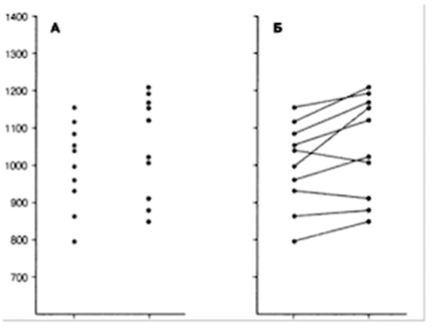

Наблюдаемое: $X_1, X_2, \cdots, X_{n_x}, Y_1, Y_2, \cdots, Y_{n_y}$

Предполагаем $X_i$ и $Y_i$ **зависимы** и нормально распределены, количество наблюдений $n_x$, $n_y$ одинаково.;

Проверяемая гипотеза: $H_0 : \mu_x = \mu_y, H_1 : \mu_x <> \mu_y$

**Статистика:** $Z = \frac {d} {\sqrt \frac {S_d^2} {n_d}} \sim N(0, 1)$ при верной $H_0$

d - среднее попарное изменение

In [24]:
sample_1 = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
            59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
            34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_2 = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
            52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
            35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]
alternative = 'two-sided'

In [25]:
stats.ttest_rel(sample_1, sample_2, alternative=alternative)

TtestResult(statistic=-2.726336530171027, pvalue=0.01074988858275567, df=29)

### Бутстрап

### Задача

Разрабатываем алгоритм для высоконагруженной системы. Есть старая версия алгоритма, при этом была подготовлена новая версия алгоритма с использовванием современных библиотек. Нужно оценить 90-перцентиль времени работы алгоритмов, проверив одностороннюю гипотезу о том, что новый алгоритм эффиктивнее.

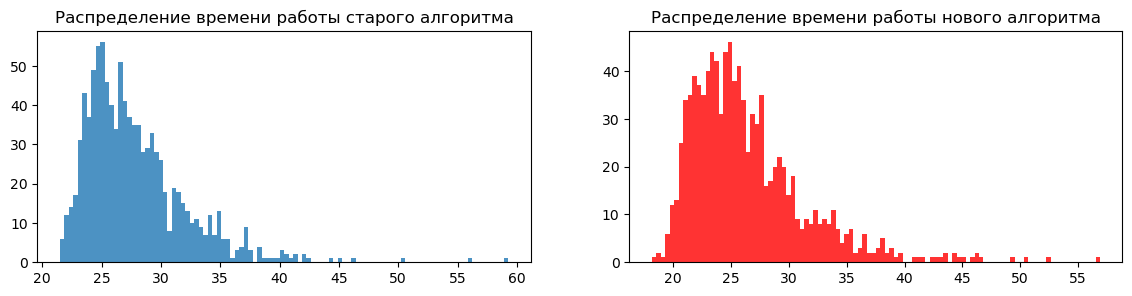

In [5]:
ln_distrib = stats.lognorm(0.5, loc=20, scale=7)
old_version = ln_distrib.rvs(size=1000)

ln_distrib = stats.lognorm(0.5, loc=17, scale=8.3)
new_version = ln_distrib.rvs(size=1000)

fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(old_version, 100, alpha=0.8)
plt.title('Распределение времени работы старого алгоритма')

ax1 = plt.subplot(122)
plt.hist(new_version, 100, alpha=0.8, color='r')
plt.title('Распределение времени работы нового алгоритма')

plt.show()

### Решение задачи

1.  Проверяемая гипотеза: $H_0 : \mu_1=\mu_2, H_1 : \mu_1 > \mu_2$

Будем проверять одностороннюю гипотезу.

2. Установим уровень значимости критерия $\alpha = 5%$.
3. Используем бутстреп.

In [3]:
from sklearn.utils import resample

In [6]:
old_version_90p_boostrap_distribution = []
new_version_90p_boostrap_distribution = []

for i in range(1000):
    sample_old_version = resample(old_version, replace=True, n_samples=100, random_state=i)
    sample_new_version = resample(new_version, replace=True, n_samples=100, random_state=i)

    old_version_90p_boostrap_distribution.append(np.percentile(sample_old_version, 90))
    new_version_90p_boostrap_distribution.append(np.percentile(sample_new_version, 90))

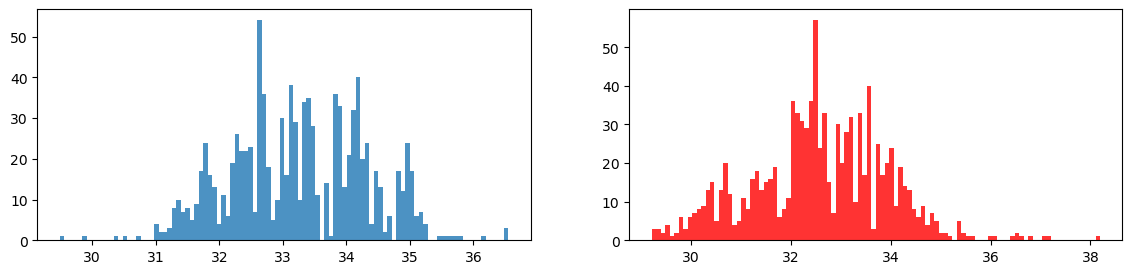

In [10]:
fig = plt.figure(figsize=(14, 3))
ax1 = plt.subplot(121)
plt.hist(old_version_90p_boostrap_distribution, 100, alpha=0.8)

ax1 = plt.subplot(122)
plt.hist(new_version_90p_boostrap_distribution, 100, alpha=0.8, color='r')

plt.show()

In [7]:
t, p = stats.ttest_ind(old_version_90p_boostrap_distribution,
                       new_version_90p_boostrap_distribution,
                       alternative='greater')

In [8]:
t

12.49345599920969

In [9]:
p

7.634745167886587e-35

4. Вывод: отвергаем нулевую гипотезу о равенстве 90 перцентилей времени работы алгоритмов в пользу односторонней альтернативы.

## Оценка долей

### Одновыборочный критейри с большим числом наблюдений

Наблюдаем: $X_1, X_2, \cdots, X_n$;

Предполагаем: $X_{i}$ независимы и имеют распределение Бернулли, количество наблюдений n велико;

Проверяемая гипотеза: $H_0 : p = p_0, H_1 : p <> p_0$

**Статистика:** $Z = \frac {p - p_0} {\frac {p_0 (1 - p_0)} {n}} \sim N(0, 1)$ при верной $H_{0}$

In [11]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array(100)
nobs = np.array(300)
value = 0.5
proportions_ztest(count, nobs, value=value)

(-6.123724356957946, 9.141298408246598e-10)

### Двувыборочный критерий с большим числом наблюдений для зависимых выборок

Наблюдаем: $X_1, X_2, \cdots, X_{n_x}, Y_1, Y_2, \cdots, Y_{n_y}$;

Предполагаем: $X_i, Y_i$ **зависимы** и имеют распределение Бернулли, количество наблюдений n велико;

Проверяемая гипотеза: $H_0 : p_x = p_y, H_1 : p_x <> p_y$

**Статистика:** $Z = \frac {f - g} {\sqrt {f + g - \frac {(f - g)^2} {n}}} \sim N(0, 1)$ при верной $H_{0}$

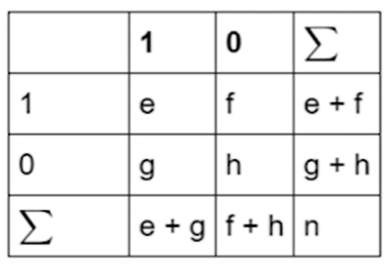

### Двувыборочный критерий с большим числом наблюдений для независимых выборок

Наблюдаем: $X_1, X_2, \cdots, X_{n_x}, Y_1, Y_2, \cdots, Y_{n_y}$;

Предполагаем: $X_i, Y_i$ независимы и имеют распределение Бернулли, количество наблюдений n велико;

Проверяемая гипотеза: $H_0 : p_x = p_y, H_1 : p_x <> p_y$

**Статистика:** $Z = \frac {p_x - p_y} {\sqrt {\frac {p_x (1 - p_x)} {n_x} + \frac {p_y (1 - p_y)} {n_y}}} \sim N(0, 1)$ при верной $H_{0}$

In [12]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([100, 400])
nobs = np.array([300, 800])
proportions_ztest(count, nobs, alternative='smaller')

(-4.944132324730442, 3.82418709507774e-07)

### Задача

Проводилось СХ исследование о положительном опыте использования приложения для доставки еды среди 200 клиентов, после этого клиентам выдали промокод одного из сервисов и через месяц среди этих же клиентов провели повторный опрос. Необходимо проверить гипотезу о том, что промокоды увеличивают положительный опыт от использования доставки.

In [13]:
survey_1 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
            1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
            0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
            1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
            1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]
survey_2 = [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
            1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
            0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
            0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
            1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]

### Решение задачи

1. Проверяемая гипотеза: $H_0 : p_x = p_y, H_1 : p_x < p_y$

Будем проверять одностороннюю гипотезу.

2. Установим уровень значимости критерия $\alpha=5%$.
3. Будем использовать критерий для долей зависимых выборок.

In [14]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)

    f = sum(1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample)
    g = sum(1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample)

    return float(f - g) / np.sqrt(f + g - float((f - g) ** 2) / n)

def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative == 'two-sided':
        return z_stat, 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

    if alternative == 'less':
        return z_stat, stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return z_stat, 1 - stats.norm.cdf(z_stat)


proportions_diff_z_test(proportions_diff_z_stat_rel(survey_1, survey_2), 'less')

(5.155800469472481, 0.9999998737251439)

4. Вывод: на уровне значимости $\alpha$ не можем отвергнуть нулевую гипотезу о том, что промокоды влияют на положительный опыт об использовании доставки.

### Критерий Хи-Квадрат

Рассмотрим пример расчёта критерия независимости хи-квадрат:

In [16]:
from scipy.stats import chi2_contingency

banner_data = pd.DataFrame()
banner_data['clicked'] = [100, 400, 500]
banner_data['non-clicked'] = [200, 400, 600]
banner_data.index = ['Баннер_А', 'Баннер_B', 'Итого']
banner_data['Total'] = banner_data['clicked'] + banner_data['non-clicked']

banner_data

,clicked,non-clicked,Total
Баннер_А,100,200,300
Баннер_B,400,400,800
Итого,500,600,1100


При работе с критерим хи-квадрат встречается понятие, как таблица ожидаемых значений.

Примем нулевую гипотезу Н0, что кликабельность по баннерам А и В одинакова, тогда:

In [17]:
clicked_total = 500 / 1100
non_clicked_total = 600 / 1100

Если баннера не влияют на кликабельность, то есть поведение клиентов при посещении сайта должно быть схожим с общим.

In [18]:
banner_A_clicked = clicked_total * 300
banner_B_clicked = clicked_total * 800

banner_A_non_clicked = non_clicked_total * 300
banner_B_non_clicked = non_clicked_total * 800

In [19]:
banner_data_E = pd.DataFrame()
banner_data_E['clicked'] = [banner_A_clicked, banner_B_clicked, 500]
banner_data_E['non-clicked'] = [banner_A_non_clicked, banner_B_non_clicked, 600]
banner_data_E.index = ['Баннер_А', 'Баннер_B', 'Итого']
banner_data_E['Total'] = banner_data['clicked'] + banner_data['non-clicked']
banner_data_E

,clicked,non-clicked,Total
Баннер_А,136.363636,163.636364,300
Баннер_B,363.636364,436.363636,800
Итого,500.000000,600.000000,1100


$\chi^2 = \sum \frac {(O - E)^2} {E}$, O - наблюдаемое значение, E - ожидаемое значение.

$\chi^2 = \sum \frac {|O - E| - \frac {1} {2}} {E}$ (с попоравкой Йеитса - только для таблиц 2х2)

In [20]:
chi2, p, dof, ex = chi2_contingency(banner_data.iloc[:2, :2])
chi2, p, dof, ex

(23.776843750000012,
 1.0817608500977008e-06,
 1,
 array([[136.36363636, 163.63636364],
        [363.63636364, 436.36363636]]))

### Точный критерий Фишера

В случае малого числа наблюдений для проверки гипотез о долях вместо Z-критерия используется точный критерий Фишера.

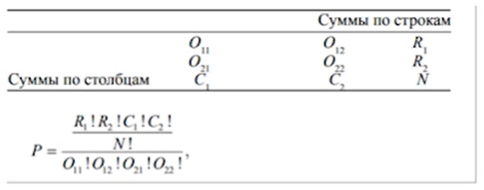

Он основан на переборе всех возможных вариантов заполнения таблиицы сопряжённости при данной численности групп.

In [21]:
df = pd.DataFrame()
df['active'] = [8, 1]
df['non-active'] = [2, 5]
df.index = ['group_1', 'group_2']
df

,active,non-active
group_1,8,2
group_2,1,5


In [22]:
stats.fisher_exact(df)

SignificanceResult(statistic=20.0, pvalue=0.034965034965034975)

Достоинством метода является соответствие полученного критерия точному значению уровня значимости p.